<a href="https://colab.research.google.com/github/lyngoo/lyn/blob/main/5%EC%9E%A5_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt 

1번


In [ ]:
#유클리드 거리

a = np.array((1,4))
b = np.array((4,2))

temp = a-b
dist = np.sqrt(np.dot(temp.T, temp))

print(dist)

3.605551275463989


In [ ]:
#맨하탄 거리
def manhattan_distance(A, B):
  distance = 0
  for i in range(len(A)):
    distance += abs(A[i] - B[i])
  return distance
 
print(manhattan_distance(A=[1,4], B=[4,2]))


5


In [ ]:
#민코브스키 거리
from math import*
from decimal import Decimal

def nth_root(value, n_root):
    root_value = 1/float(n_root)
    return round (Decimal(value) ** Decimal(root_value),5)

def minkowski_distance(a,b,p):
    return nth_root(float(np.sum((a-b)**p)), p)

a = np.array([1,4])
b = np.array([4,2])

#차수가 '1' 일때
print(minkowski_distance(a,b,1))

#차수가 '2' 일때
print(minkowski_distance(a,b,2))

-1.00000
3.60555


In [ ]:
#코사인 유사도
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([1,4])
doc2 = np.array([4,2])

print(cos_sim(doc1, doc2))

0.6507913734559685


2번


In [ ]:
X_train = np.array([[10, 8],
           [20, 4],
           [20, 6],
           [40, 4],
           [50, 8]])
y_train = np.array([0, 0, 0, 1, 1])

In [ ]:
X_test = np.array([[30, 6]])

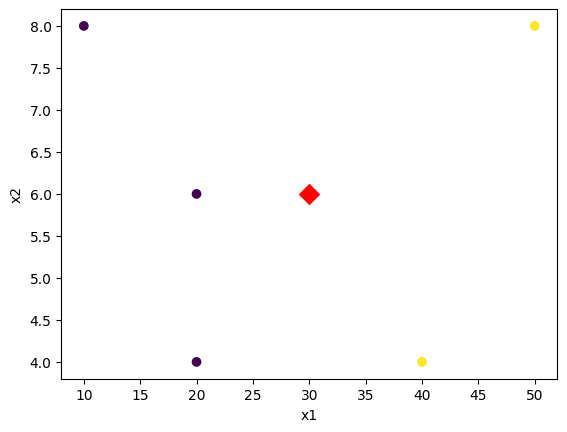

In [ ]:
plt.scatter(X_train[:, 0],  X_train[:, 1], c=y_train) 
# 테스트용 데이터
plt.scatter(X_test[:, 0],  X_test[:, 1], c='red', marker = 'D', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show() 

In [ ]:
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_std = scalerX.transform(X_train)
print(X_train_std)

[[-1.22474487  1.11803399]
 [-0.54433105 -1.11803399]
 [-0.54433105  0.        ]
 [ 0.81649658 -1.11803399]
 [ 1.4969104   1.11803399]]


In [ ]:
# 피처 스케일링: 테스트용 데이터 
X_test_std = scalerX.transform(X_test)
print(X_test_std)

[[0.13608276 0.        ]]


In [ ]:
# 모형화 
knn = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')
# 학습
knn.fit(X_train_std, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
# 예측 
# predict: 예측한 클래스 반환
pred = knn.predict(X_test_std)
print(pred)

[0]


In [ ]:
# 클래스 별 확률 값을 반환
knn.predict_proba(X_test_std)

array([[0.66666667, 0.33333333]])

In [ ]:
# 인접한 k개의 sample에 대해 거리, index를 반환
dist, index = knn.kneighbors(X_test_std)
print(dist)
print(index) 

[[0.68041382 1.30880211 1.30880211]]
[[2 1 3]]


In [ ]:
# 학습용 데이터(기존 개체) 
# 입력 
X_train = np.array([[10, 8],
           [20, 4],
           [20, 6],
           [40, 4],
           [50, 8]])
# 라벨 
y2_train = np.array([[100], [60], [50], [40], [100]])

In [ ]:
# 테스트용 데이터(새로운 개체) 
# 입력 
X_test = np.array([[30, 6]])

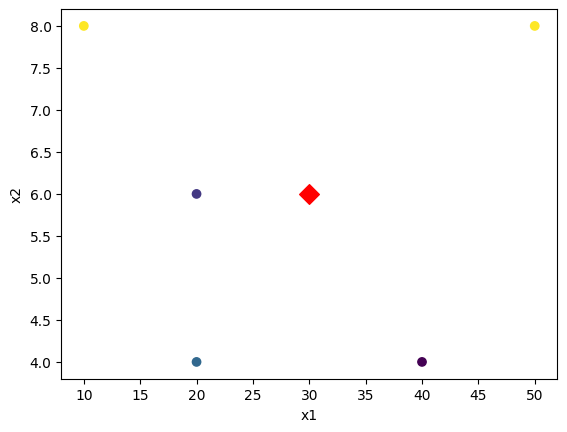

In [ ]:
# 산포도 
# 학습용 데이터 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y2_train) 
# 테스트용 데이터
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', marker = 'D', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show() 

In [ ]:
# 피처 스케일링: 학습용 데이터 
# 입력 값
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_std = scalerX.transform(X_train)
print(X_train_std)

# 목표 값 
scalerY = StandardScaler()
scalerY.fit(y2_train)
y2_train_std = scalerY.transform(y2_train)
print(y2_train_std)

[[-1.22474487  1.11803399]
 [-0.54433105 -1.11803399]
 [-0.54433105  0.        ]
 [ 0.81649658 -1.11803399]
 [ 1.4969104   1.11803399]]
[[ 1.18585412]
 [-0.39528471]
 [-0.79056942]
 [-1.18585412]
 [ 1.18585412]]


In [ ]:
# 피처 스케일링: 테스트용 데이터 
X_test_std = scalerX.transform(X_test)
print(X_test_std)

[[0.13608276 0.        ]]


In [ ]:
# 모형화 
knn = KNeighborsRegressor(n_neighbors = 3, metric='euclidean', weights="uniform")
# 학습
knn.fit(X_train_std, y2_train_std)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [ ]:
# 예측 
y2_pred = knn.predict(X_test_std)
print(y2_pred)

[[-0.79056942]]


In [ ]:
# 예측 값의 역변환
y2_pred_inverse = scalerY.inverse_transform(y2_pred)
print(y2_pred_inverse)

[[50.]]
